In [26]:
import pandas as pd
import geopandas as gpd


In [23]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/feb_2021.csv",encoding= 'unicode_escape')


In [24]:
d1.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T15:45:00+00:00,2021-02-05T21:15:00+05:30,pm25,62.00,Âµg/mÂ³,12.920984,77.584908
1,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,48.00,Âµg/mÂ³,12.938539,77.590100
2,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,64.02,Âµg/mÂ³,13.027020,77.494094
3,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,78.00,Âµg/mÂ³,12.951913,77.539784
4,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,41.00,Âµg/mÂ³,12.917348,77.622813


In [27]:
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,geometry
0,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T15:45:00+00:00,2021-02-05T21:15:00+05:30,pm25,62.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)
1,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,48.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
2,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,64.02,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
3,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,78.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
4,6975,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T16:00:00+00:00,2021-02-05T21:30:00+05:30,pm25,41.00,Âµg/mÂ³,12.917348,77.622813,POINT (77.62281 12.91735)


In [28]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

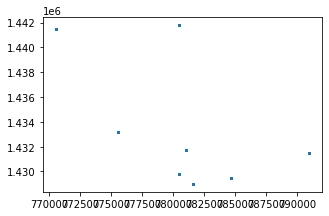

In [29]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

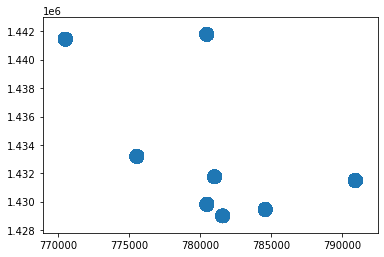

In [30]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [31]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202102.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,34.803032,34.311360,35.021178,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,34.945097,34.244581,35.489794,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,36.218355,35.532791,36.751317,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,36.810736,36.475813,36.966614,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,35.783677,35.240128,36.342522,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [32]:
February2021_spatial_join= gpd.sjoin(d1,d2, how='inner')
February2021_spatial_join.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T15:45:00+00:00,2021-02-05T21:15:00+05:30,pm25,62.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,29.766344,29.728567,29.809871
11,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T17:00:00+00:00,2021-02-05T22:30:00+05:30,pm25,64.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,29.766344,29.728567,29.809871
17,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T18:15:00+00:00,2021-02-05T23:45:00+05:30,pm25,53.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,29.766344,29.728567,29.809871
21,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T18:30:00+00:00,2021-02-06T00:00:00+05:30,pm25,53.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,29.766344,29.728567,29.809871
28,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-02-05T20:30:00+00:00,2021-02-06T02:00:00+05:30,pm25,52.0,Âµg/mÂ³,12.920984,...,"POLYGON ((780985.582 1429813.152, 780983.174 1...",47784,47785,780396.557282,1.430192e+06,780496.557282,1.430092e+06,29.766344,29.728567,29.809871


In [33]:
February2021_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/February2021_spatial_join.csv")

### February 2021

In [34]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/march_2021.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,geometry
0,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,33.72,Âµg/mÂ³,12.913522,77.595080,POINT (77.59508 12.91352)
1,6983,"Hombegowda Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,58.00,Âµg/mÂ³,12.938539,77.590100,POINT (77.59010 12.93854)
2,6973,"Jayanagar 5th Block, Bengaluru - KSPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,59.00,Âµg/mÂ³,12.920984,77.584908,POINT (77.58491 12.92098)
3,6974,"Bapuji Nagar, Bengaluru - KSPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,76.00,Âµg/mÂ³,12.951913,77.539784,POINT (77.53978 12.95191)
4,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,25.95,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)


In [35]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

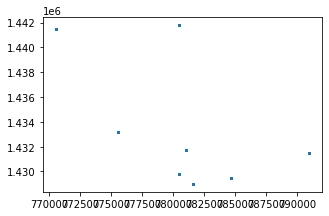

In [36]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

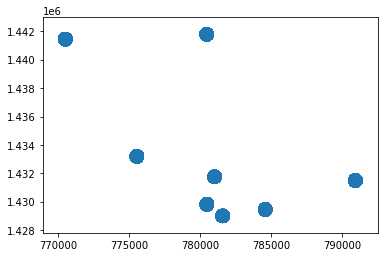

In [37]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [38]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202103.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,35.871919,35.529184,36.119738,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,36.566327,35.898567,37.127868,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,37.646166,37.011465,38.056770,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,37.739278,37.454515,38.037784,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,37.005412,36.470944,37.406819,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [39]:
March2021_spatial_join= gpd.sjoin(d1,d2, how='inner')
March2021_spatial_join.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T02:00:00+00:00,2021-03-01T07:30:00+05:30,pm25,33.72,Âµg/mÂ³,12.913522,...,"POLYGON ((782098.429 1428998.345, 782096.022 1...",51262,51263,781396.557282,1.429392e+06,781496.557282,1.429292e+06,32.3232,32.163168,32.514854
9,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T02:30:00+00:00,2021-03-01T08:00:00+05:30,pm25,31.45,Âµg/mÂ³,12.913522,...,"POLYGON ((782098.429 1428998.345, 782096.022 1...",51262,51263,781396.557282,1.429392e+06,781496.557282,1.429292e+06,32.3232,32.163168,32.514854
16,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T03:00:00+00:00,2021-03-01T08:30:00+05:30,pm25,31.45,Âµg/mÂ³,12.913522,...,"POLYGON ((782098.429 1428998.345, 782096.022 1...",51262,51263,781396.557282,1.429392e+06,781496.557282,1.429292e+06,32.3232,32.163168,32.514854
27,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T05:45:00+00:00,2021-03-01T11:15:00+05:30,pm25,43.67,Âµg/mÂ³,12.913522,...,"POLYGON ((782098.429 1428998.345, 782096.022 1...",51262,51263,781396.557282,1.429392e+06,781496.557282,1.429292e+06,32.3232,32.163168,32.514854
33,5548,"BTM Layout, Bengaluru - CPCB",Bengaluru,IN,2021-03-01T06:00:00+00:00,2021-03-01T11:30:00+05:30,pm25,43.67,Âµg/mÂ³,12.913522,...,"POLYGON ((782098.429 1428998.345, 782096.022 1...",51262,51263,781396.557282,1.429392e+06,781496.557282,1.429292e+06,32.3232,32.163168,32.514854


In [40]:
March2021_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/March2021_spatial_join.csv")

### April 2021

In [41]:
d1=pd.read_csv("C:/Users/rajpa/Desktop/New folder month/april_2021.csv",encoding= 'unicode_escape')
d1 = gpd.GeoDataFrame(d1,geometry = gpd.points_from_xy(d1['longitude'],d1['latitude']))
d1.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,geometry
0,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-01T23:00:00+00:00,2021-04-02T04:30:00+05:30,pm25,35.03,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
1,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T05:00:00+00:00,2021-04-02T10:30:00+05:30,pm25,51.40,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)
2,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T05:00:00+00:00,2021-04-02T10:30:00+05:30,pm25,36.60,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
3,5607,"Peenya, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T13:45:00+00:00,2021-04-02T19:15:00+05:30,pm25,399.52,Âµg/mÂ³,13.027020,77.494094,POINT (77.49409 13.02702)
4,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T13:45:00+00:00,2021-04-02T19:15:00+05:30,pm25,40.35,Âµg/mÂ³,12.935205,77.681449,POINT (77.68145 12.93520)


In [42]:
d1=d1.set_crs('epsg:4326')
d1=d1.to_crs('epsg:32643')
d1.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

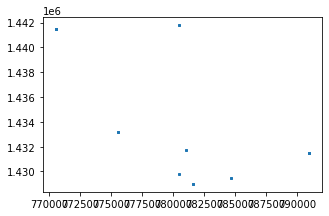

In [43]:
d1.plot(markersize=1.5,figsize=(5,5))

<AxesSubplot:>

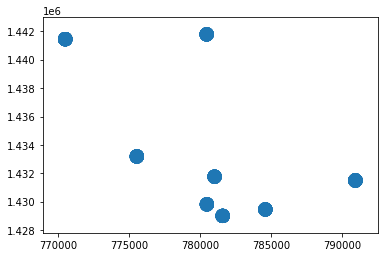

In [44]:
d1['geometry'] = d1.geometry.buffer(500)
d1.plot()

In [45]:
d2=gpd.read_file("C:/Users/rajpa/Desktop/Final datset/CSV _Zonal_statistics_files/zonal_202104.GeoJson")

d2.head()

,id,left,top,right,bottom,_mean,_min,_max,geometry
0,1,766696.557282,1.454692e+06,766796.557282,1.454592e+06,36.776080,36.468602,37.088524,"POLYGON ((766696.557 1454691.820, 766796.557 1..."
1,2,766696.557282,1.454592e+06,766796.557282,1.454492e+06,36.728585,36.352002,37.170910,"POLYGON ((766696.557 1454591.820, 766796.557 1..."
2,3,766696.557282,1.454492e+06,766796.557282,1.454392e+06,37.594959,36.921318,37.934044,"POLYGON ((766696.557 1454491.820, 766796.557 1..."
3,4,766696.557282,1.454392e+06,766796.557282,1.454292e+06,37.932684,37.794622,38.040252,"POLYGON ((766696.557 1454391.820, 766796.557 1..."
4,5,766696.557282,1.454292e+06,766796.557282,1.454192e+06,37.132902,36.556754,37.570614,"POLYGON ((766696.557 1454291.820, 766796.557 1..."


In [46]:
April2021_spatial_join= gpd.sjoin(d1,d2, how='inner')
April2021_spatial_join.head()

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,...,geometry,index_right,id,left,top,right,bottom,_mean,_min,_max
0,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-01T23:00:00+00:00,2021-04-02T04:30:00+05:30,pm25,35.03,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,31.159959,30.824195,31.614104
1,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T05:00:00+00:00,2021-04-02T10:30:00+05:30,pm25,51.40,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,31.159959,30.824195,31.614104
4,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-02T13:45:00+00:00,2021-04-02T19:15:00+05:30,pm25,40.35,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,31.159959,30.824195,31.614104
5,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-05T04:45:00+00:00,2021-04-05T10:15:00+05:30,pm25,70.00,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,31.159959,30.824195,31.614104
6,5547,"BWSSB Kadabesanahalli, Bengaluru - CPCB",Bengaluru,IN,2021-04-05T19:15:00+00:00,2021-04-06T00:45:00+05:30,pm25,79.68,Âµg/mÂ³,12.935205,...,"POLYGON ((791451.434 1431495.140, 791449.026 1...",83516,83517,790696.557282,1.431092e+06,790796.557282,1.430992e+06,31.159959,30.824195,31.614104


In [47]:
April2021_spatial_join.to_csv("C:/Users/rajpa/Desktop/final_JOIN/April2021_spatial_join.csv")